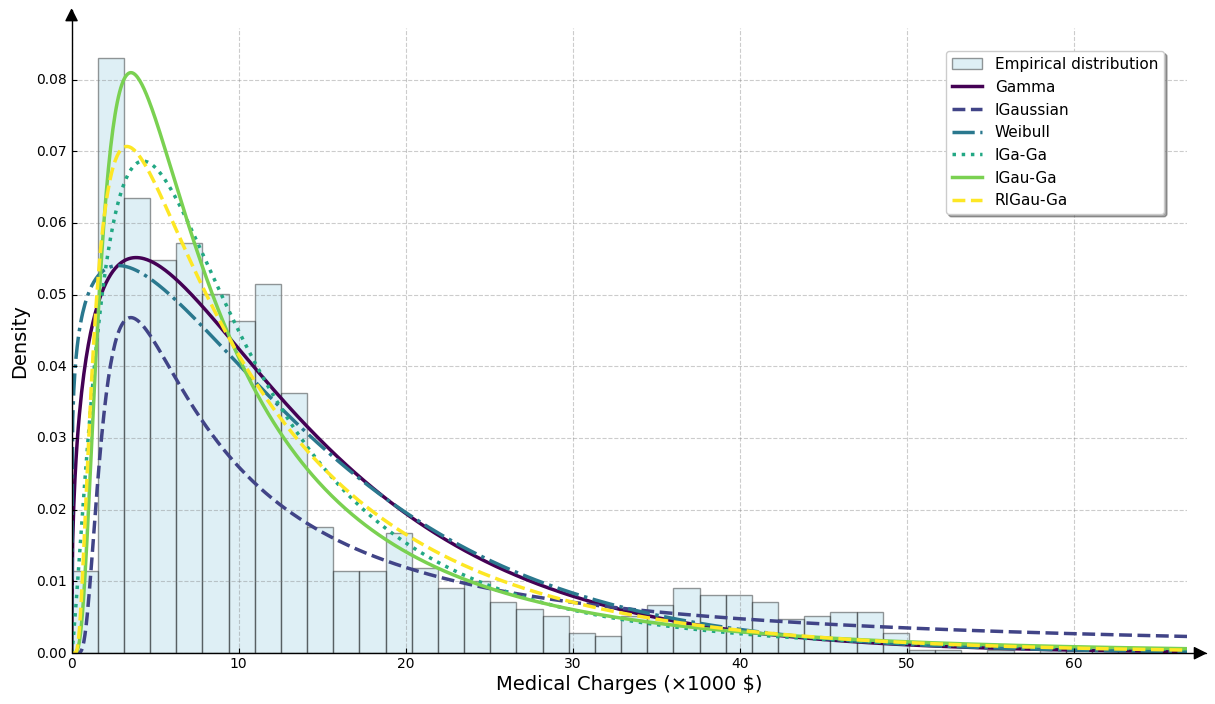

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma, invgauss, weibull_min
from scipy.special import gamma as ga
from scipy.special import kv
from mpl_toolkits.axisartist.axislines import SubplotZero

# 读入 CSV 文件
df = pd.read_csv(r'C:\Users\user\Desktop\insurance.csv')

# 提取医疗费用变量
y = df["charges"].values / 1000

x = np.linspace(0, y.max() + 3, 1000)

def gamma_pdf(x, alpha, beta):
    return gamma.pdf(x, a=alpha, scale=1 / beta)

def invgauss_pdf(x, mu, lam):
    return invgauss.pdf(x, mu=mu, scale=lam)

def weibull_pdf(x, k, lam):
    return weibull_min.pdf(x, c=k, scale=lam)

def IGaGa_pdf(x, alpha, mu, lambd):
    term1 = alpha ** alpha * (lambd - 1) ** lambd * x ** (alpha - 1) / mu ** alpha
    term2 = ga(alpha + lambd) / ga(alpha) / ga(lambd)
    term3 = (alpha * x / mu + lambd - 1) ** (-alpha - lambd)
    return term1 * term2 * term3

def IGauGa_pdf(x, alpha, mu, lambd):
    term1 = np.exp(lambd) * np.sqrt(2 * lambd / np.pi)
    term2 = alpha ** alpha * x ** (alpha - 1) / mu ** alpha / ga(alpha)
    term3 = (lambd / (lambd + 2 * alpha * x / mu)) ** (alpha * 0.5 + 0.25)
    z = np.sqrt(lambd * (lambd + 2 * alpha * x / mu))
    term4 = kv(alpha + 0.5, z)
    return term1 * term2 * term3 * term4

def RIGauGa_pdf(x, alpha, mu, lambd):
    term1 = np.exp(1 / (lambd - 1)) * np.sqrt(2 * lambd / np.pi / (lambd - 1))
    term2 = alpha ** alpha * x ** (alpha - 1) / mu ** alpha / ga(alpha)
    term3 = ((1 / (lambd * (lambd - 1)) + 2 * alpha * x / mu) / (lambd / (lambd - 1))) ** (-alpha * 0.5 + 0.25)
    z = np.sqrt(lambd / (lambd - 1) * (1 / lambd / (lambd - 1) + 2 * alpha * x / mu))
    term4 = kv(-alpha + 0.5, z)
    return term1 * term2 * term3 * term4

gamma_params = {"alpha": 1.410466, "beta": 0.10629}
ig_params    = {"mu": 13.27042, "lam": 10.64692}
weib_params  = {"k": 1.175563, "lam": 14.09976}
IGaGa_params = {"alpha": 2.344535, "mu": 13.61304, "lambd": 3.430557}
IGauGa_params = {"alpha": 8.4449, "mu": 13.43239, "lambd": 1.001269}
RIGauGa_params = {"alpha": 43.74785, "mu": 13.27894, "lambd": 2.201968}

fig = plt.figure(figsize=(12, 7), dpi=100)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["left", "right", "top", "bottom"]:
    ax.axis[direction].set_visible(False)

xaxis = ax.axis["x"] = ax.new_floating_axis(0, 0)
yaxis = ax.axis["y"] = ax.new_floating_axis(1, 0)

xaxis.set_axisline_style("-|>", size=2.0)
yaxis.set_axisline_style("-|>", size=2.0)

xaxis.set_ticklabel_direction("-")
yaxis.set_ticklabel_direction("-")
ax.axis["x"].set_axis_direction("bottom")
ax.axis["y"].set_axis_direction("left")

# ===================== 直方图 =====================

bin_width = (y.max() - y.min()) / 40
bins = np.arange(0, np.ceil(y.max() / bin_width) * bin_width + bin_width,
                 bin_width)
ax.hist(
    y,
    bins=bins, 
    density=True,
    alpha=0.4,
    color="lightblue",
    edgecolor="black",
    label="Empirical distribution"
)

# ===================== 拟合曲线 =====================
colors = plt.cm.viridis(np.linspace(0, 1, 6))
line_styles = ['-', '--', '-.', ':', '-', '--']

ax.plot(x, gamma_pdf(x, **gamma_params),
        lw=2.5, ls='-', color=colors[0], label="Gamma")

ax.plot(x, invgauss_pdf(x, **ig_params),
        lw=2.5, ls='--', color=colors[1], label="IGaussian")

ax.plot(x, weibull_pdf(x, **weib_params),
        lw=2.5, ls='-.', color=colors[2], label="Weibull")

ax.plot(x, IGaGa_pdf(x, **IGaGa_params),
        lw=2.5, ls=':', color=colors[3], label="IGa-Ga")

ax.plot(x, IGauGa_pdf(x, **IGauGa_params),
        lw=2.5, ls='-', color=colors[4], label="IGau-Ga")

ax.plot(x, RIGauGa_pdf(x, **RIGauGa_params),
        lw=2.5, ls='--', color=colors[5], label="RIGau-Ga")

# ===================== 坐标范围 =====================
ax.set_xlim(0, max(y) + 3)
ax.set_ylim(0, None)

# ===================== 标签 =====================
ax.axis["x"].label.set_text("Medical Charges (×1000 $)")
ax.axis["y"].label.set_text("Density")
ax.axis["x"].label.set_fontsize(14)
ax.axis["y"].label.set_fontsize(14)

# ===================== 图例 =====================
legend = ax.legend(
    loc="upper right",
    fontsize=11,
    frameon=True,
    shadow=True,
    facecolor="white",
    borderaxespad=1.5
)

# ===================== 网格 =====================
ax.grid(True, linestyle='--', alpha=0.4, color='grey')

plt.tight_layout()
plt.show()
